## Installation des modules nécessaires : 

#### Installation du chromedriver sur SSP CLOUD 

In [3]:
#!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
#!sudo apt-get update
#!sudo -E apt-get install -y /tmp/chrome.deb
#!pip install chromedriver-autoinstaller selenium

In [1]:
import chromedriver_autoinstaller
chromedriver_autoinstaller.install() 

'/opt/mamba/lib/python3.10/site-packages/chromedriver_autoinstaller/108/chromedriver'

#### Installation du chromedriver sur Google Colab 

In [7]:
#!sudo apt-get update
#!sudo apt install -y unzip xvfb libxi6 libgconf-2-4 -y
#!sudo apt install chromium-chromedriver -y
#!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Si vous rencontrez des diffultés à installer le chromedriver, veuillez vous référer au [site](https://chromedriver.chromium.org/).

#### Autres modules à installer

In [5]:
#!pip install selenium

In [7]:
#!pip install unidecode

In [2]:
import main

data_tools importé !
conversion_tools importé !
scraping_marmiton importé ! 
scrapping_ciqual importé !



# I-Récupération des données :

### A - Le scrapping de Marmiton :

Notre projet a débuté par de la récupération de données. La première étape a été de récupérer les données provenant de Marmiton. Dans le fichier `scrapping_marmiton.py` se trouvent l'ensemble des fonctions nécessaires pour l'extraction de ces données. Pour scrapper les données de Marmiton, nous avons fait le choix de réaliser un scrapping statique grâce à la méthode `BeautifulSoup`. Comparée à un scrapping dynamique, cette technique présentait pour nous deux avantages : 
1) déjà, n'ayant jamais fait de scrapping auparavant, cette méthode était plus abordable et plus facile à coder. 
2) ensuite, elle ignore complètement la présence de fenêtres pop-up publicitaires, présentes dès l'ouverture de la page d'accueil, et pouvant apparaître au cours de la recherche. Ne pas avoir à gérer ces fenêtres publicitaires nous a notamment permis d'optimiser le temps d'execution de l'algorithme car nous n'avions pas besoin d'utiliser des commandes telles que `time.sleep()`.


In [29]:
from scrapping.scrapping_marmiton import *

Le scrapping des données Marmiton à partir d'une recherche de type `'végétarien'` se fait en trois étapes :

1) tout d'abord, la fonction `find_all_dishes` trouve l'ensemble des pages de proposition correspondant à la recherche `'végétarien'`, une page de recherche étant une page sur laquelle s'affiche une dizaine de plats.
2) ensuite, cette même fonction récupère à partir de ces pages de proposition, les urls des pages des plats proposés pour la recherche `'végétarien'`

In [30]:
find_all_dishes('végétarien',5)

['https://www.marmiton.org/recettes/recette_lasagnes-vegetariennes-facile_10527.aspx',
 'https://www.marmiton.org/recettes/recette_hachis-parmentier-vegetarien_14594.aspx',
 'https://www.marmiton.org/recettes/recette_curry-de-legumes-vegetarien_88522.aspx',
 'https://www.marmiton.org/recettes/recette_hamburger-vegetarien_19445.aspx',
 'https://www.marmiton.org/recettes/recette_tourte-de-noel-vegetarienne-de-coralie_15536.aspx']

3) finalement, la fonction `find_all_recipes` récupère grâce à la fonction `find_recipe` pour chaque plat proposé pour la recherche `'végétarien'` : 
- le nom de la recette,
- la recette (ingrédients et quantités), 
- le nombre de personnes,  
- le nombre de commentaires. 

Notez que la conversion de toutes les quantités en grammes est expliquée plus en détail dans le fichier readme

find_all_recipes('végétarien',5)

### B - Scrapping Ciqual :

Une fois les données de Marmiton obtenues, notre objectif était de croiser ces données avec les données nutritionnelles de la base Ciqual de l’ANSES. Pour chaque ingrédient de chaque recette scrappée sur Marmiton, nous souhaitions obtenir les apports nutritionnels globaux (apport calorique et énergétique), ainsi que la composition nutritionnelle pour quelques nutriments principaux (lipides, glucides, protéines…).

Nous avons décidé de scrapper directement le site internet de Ciqual, pour récupérer les données souhaitées. Cette méthode avait de nombreux avantages: tout d’abord, nous bénéficiions du moteur de recherche de Ciqual, et n’avions qu’à nous assurer de formuler correctement notre recherche pour obtenir un résultat adéquat ; pour chaque recherche, nous avons ainsi gardé le premier résultat. Ensuite, le site de Ciqual offrait la possibilité de consulter directement la composition abrégée de l’ingrédient cherché, soit les nutriments principaux retenus pour notre étude. Enfin, cette méthode présentait pour nous un intérêt pédagogique : le site de Ciqual étant codé de façon dynamique, le scrapping nécessitait ici l’utilisation de `Selenium`.

Dans le fichier `scrapping_ciqual.py` vous trouverez la fonction `nutrition` nécessaire à la collecte des données Ciqual. Notre scrapper fonctionne avec le browser `chromedriver`.

## Graphique compare_recipes 

In [12]:
from main import looking_for, compare_recipes

In [13]:
search = "végétarien"
number_of_recipe = 5
test_compare_recipes = looking_for(search, number_of_recipe)

Etape 1 : récupération des recettes que vous propose Marmiton pour :  végétarien


  0%|          | 0/5 [00:00<?, ?it/s]

Les recettes proposées par Marmiton ont été récupérées !

Etape 2 : évaluons la qualité nutritionnelle des recettes que vous propose Marmiton
Si le programme plante, veuillez relancer le Kernel, un problème lié au scrapping est peut-être survenu


  0%|          | 0/62 [00:00<?, ?it/s]

La qualité nutritionnelle des recettes correspondant à votre recherche est récupérée !
Temps d'execution : 123.20178771018982 



##### Si vous n'avez pas le temps de faire tourner le programme `looking_for` (environ 2 min pour 5 recettes), vous pouvez tester les fonctions suivantes grâce à la commande ci-dessous : 

In [ ]:
#import pandas as pd
#test_compare_recipes = pd.read_csv('references/vege5.csv')

In [ ]:
test_compare_recipes.sample(5)

In [ ]:
nutriment = "Sucres (g)"
compare_recipes(test_compare_recipes, nutriment)

## Graphique compare_food

In [ ]:
from main import compare_food

Pour cette analyse descriptive, nous nous basons sur un échantillon de 100 recettes par catégorie (avec ou sans viande), qui correspond aux 100 premiers résultats obtenus en effectuant les recherches "vegetarien" et "viande" sur Marmiton.

*N.B : Les données utilisées ci-dessous ont été scrappées grâce à la fonction `looking_for`. En raison du temps d'exécution de celle-ci sur 100 recettes, nous avons préféré stocker les données dans le dossier `references` et y faire directement appel.*

In [ ]:
import pandas as pd
test_compare_food_1 = pd.read_csv('references/vege100.csv')
test_compare_food_2 = pd.read_csv('references/viande100.csv')

In [ ]:
compare_food(test_compare_food_1, 'végétarien', test_compare_food_2, 'viande')

Les repas avec viande ont toujours des apports nutritionnels plus élevés que les repas végétariens. C'est surtout vrai pour les glucides, lipides et protéines.

## Graphique nutriStandard et fonction nutriTest

In [ ]:
test_nutriStandard = looking_for('Ragout végétarien aux légumes', 1)

##### Si vous n'avez pas le temps de faire tourner le programme `looking_for` (environ 30 sec pour 1 recette), vous pouvez tester les fonctions suivantes grâce à la commande ci-dessous : 

In [ ]:
#import pandas as pd
#test_nutriStandard = pd.read_csv('references/Ragoût_végétarien.csv')

In [ ]:
from main import nutriStandard
nutriStandard(test_nutriStandard).show()

### Combien de recettes végétariennes/avec viande sont-elles "équilibrées" ?

À partir des seuils utilisés ci-dessus, nous pouvons proposer une définition d'un repas équilibré, comme un repas conférant un apport satisfaisant à la fois en Lipides, en Glucides et en Protéines.

La question est désormais de savoir dans quelle mesure les recettes végétariennes peuvent être considérées comme équilibrées, et s'il existe une différence significative entre ces dernières et les recettes avec viande.

In [ ]:
import pandas as pd
from main import nutriTest

In [ ]:
test_nutriStandard_vege = pd.read_csv('references/vege100.csv')
test_nutriStandard_viande = pd.read_csv('references/viande100.csv')

In [ ]:
df_vege = nutriTest(test_nutriStandard_vege)
df_viande = nutriTest(test_nutriStandard_viande)

In [ ]:
#Pour compter le nombre de repas équilibré dans l'échantillon
df_vege['Repas équilibré'].value_counts()

Sur notre échantillon de 100 recettes végétariennes, seules 3 recettes peuvent être considérées comme équilibrées.

In [ ]:
df_viande['Repas équilibré'].value_counts()

Sur notre échantillon de 100 recettes avec viande, aucune recette ne peut être considérée comme équilibrée.

Le critère *repas équilibré* semble très exigeant. Nous pouvons toutefois penser que les repas végétariens sont plus sains que les repas avec viande. Pour en avoir le coeur net, regardons dans le détail les proportions de recettes qui peuvent être considérées comme satisfaisantes en l'un des trois macronutriments.

In [ ]:
print(df_vege['Satisfaisant en glucides'].value_counts())
print(df_vege['Satisfaisant en lipides'].value_counts())
print(df_vege['Satisfaisant en protéines'].value_counts())

In [ ]:
print(df_viande['Satisfaisant en glucides'].value_counts())
print(df_viande['Satisfaisant en lipides'].value_counts())
print(df_viande['Satisfaisant en protéines'].value_counts())

Pour chacun des macronutriments, on compte plus de recettes ayant un apport satisfaisant au sein des recettes végétariennes qu'au sein des recettes avec viande. On peut donc dire que les plats végétariens sont plus sains que les plats avec viande, en particulier sur le critère *glucides*, et de manière encore plus nette sur le critère *protéines*.

Notons que les protéines sont souvent citées comme un exemple de nutriment pouvant manquer dans un régime végétarien. Les graphiques précédents nous ont montré que les recettes végétariennes sont en moyennes moins riches en protéines que les recettes avec viande. Or ces mêmes recettes végétariennes sont aussi plus saines dans leur apport en protéines. Ici, ce sont en fait les recettes carnées qui seraient trop riches en protéines.

# III - Modélisation

In [4]:
from main import reg, prepare_reg

In [5]:
import pandas as pd
base_vege=pd.read_csv('references/vege100.csv')
base_non_vege=pd.read_csv('references/viande100.csv')
prepared_df = prepare_reg(base_vege, base_non_vege)

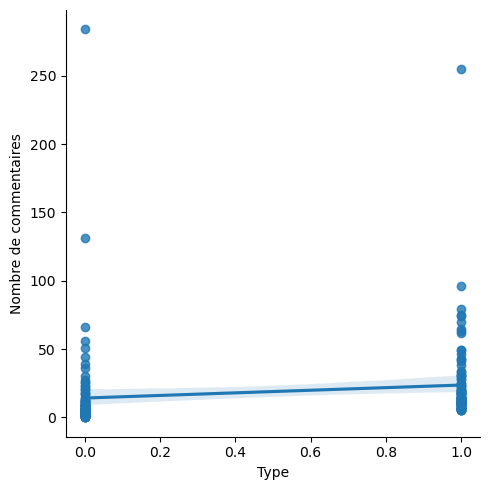

In [7]:
import seaborn as sns
sns.lmplot(x="Type", y="Nombre de commentaires", data=prepared_df)

In [8]:
reg(base_vege, base_non_vege, ['Type'])

                              OLS Regression Results                              
Dep. Variable:     Nombre de commentaires   R-squared:                       0.023
Model:                                OLS   Adj. R-squared:                  0.018
Method:                     Least Squares   F-statistic:                     4.713
Date:                    Tue, 20 Dec 2022   Prob (F-statistic):             0.0311
Time:                            19:51:10   Log-Likelihood:                -969.84
No. Observations:                     200   AIC:                             1944.
Df Residuals:                         198   BIC:                             1950.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [11]:
variables = ['Protéines (g)','Type']
reg(base_vege, base_non_vege, variables)

                              OLS Regression Results                              
Dep. Variable:     Nombre de commentaires   R-squared:                       0.023
Model:                                OLS   Adj. R-squared:                  0.013
Method:                     Least Squares   F-statistic:                     2.354
Date:                    Tue, 20 Dec 2022   Prob (F-statistic):             0.0976
Time:                            19:52:24   Log-Likelihood:                -969.83
No. Observations:                     200   AIC:                             1946.
Df Residuals:                         197   BIC:                             1956.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

In [14]:
variables = ['Protéines (g)','Glucides (g)','Sucres (g)','Lipides (g)','AG saturés (g)','Type']
reg(base_vege, base_non_vege, variables)

                              OLS Regression Results                              
Dep. Variable:     Nombre de commentaires   R-squared:                       0.037
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     1.234
Date:                    Tue, 20 Dec 2022   Prob (F-statistic):              0.291
Time:                            19:53:17   Log-Likelihood:                -968.43
No. Observations:                     200   AIC:                             1951.
Df Residuals:                         193   BIC:                             1974.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons